In [1]:
# Import modules
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Setup system path to import local modules
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from data import StockDataset
from utils import TICKERS, predict_direction, predict_close
import metrics as mymetrics
import graph_utils as graph

In [2]:
### Let's test some different hyperparameters for direction prediction

# Build and split dataset. We'll use MSFT to test for best hyperparameters
# Also drop some fields like high, low, and open
ds = StockDataset(tickers='MSFT', delta=1, keep_volume=False)
ds.drop(fields=['High', 'Low', 'Open'])
t_data, v_data, t_label, v_label = ds.split(label_field='Direction')

print('Train data shape:', t_data.shape)
print('Val data shape:', v_data.shape)

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

Initializing data...


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.66s/it]

Done.
Train data shape: (994, 6)
Val data shape: (248, 6)


In [3]:
# Set hyperparameters to test
hyperparameters = {
    'C': [0.5, 1.0, 1.5],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [3, 4, 5],
    'gamma': ['scale', 'auto']
}

# Build direction classifier with 1000 estimators
direction_clf = SVC()

# Use built-in sklearn class to test different hyperparameters (may take awhile)
grid_search = GridSearchCV(direction_clf, hyperparameters, n_jobs=2, verbose=3).fit(t_data, t_label)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    6.9s
[Parallel(n_jobs=2)]: Done 166 tasks      | elapsed:   16.8s
[Parallel(n_jobs=2)]: Done 360 out of 360 | elapsed:   33.4s finished


In [4]:
# Get best parameters
best_params = grid_search.best_params_
c = best_params['C']
kernel = best_params['kernel']
degree = best_params['degree']
gamma = best_params['gamma']

In [5]:
### Now let's see how we do on all 10 stocks

# Build a classifier with our discovered parameters
clf = SVC(C=c, kernel=kernel, degree=degree, gamma=gamma)

# Use our previously created function to predict the direction
direction_results = predict_direction(clf, TICKERS, delta=1, keep_volume=False)

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:46<00:00,  4.61s/it]


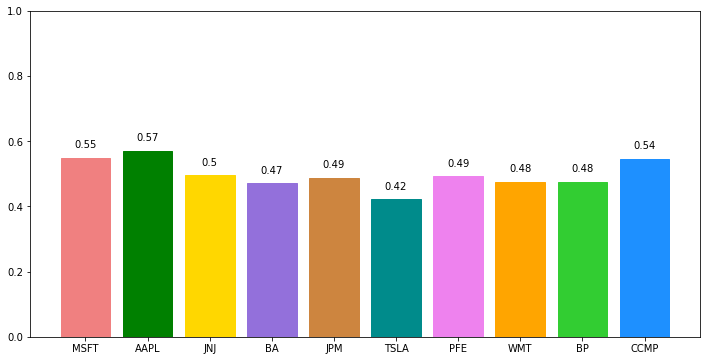

In [6]:
# And let's plot the accuracy for each ticker
graph.plot_direction_accuracy(direction_results)